# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [43]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [44]:
'''
Since pandas also provides functions for basic statistical
analysis, in theory I'd chose to use those. There's no point in
converting a Series to an array first just to be able to
use numpy functions. Without need, you will either have to
convert the Series to an array five times or introduce an additional
variable. Both would make the code less elegant and waste either
processor time (unless numpy is really faster) or memory.

Then again, I stumbled upon a difference in calculating the
standard deviation. While pandas and other software packages such as
Octave/Matlab and even LibreOffice by default calculate the
standard deviation for the population, numpy calculates it for the
sample, so the results would differ.

Unfortunately, the assignment doesn't state which value
should be used, but I guess sample makes more sense. That's why I
set the degrees of freedom to 0 for pandas' std().

So, just in case I would fail because I didn't simply follow the
assignment and used pandas instead of numpy, please use the
code block directly below instead :-)
'''

'''
# convert pandas Series to numpy array
np_prices = np.array(prices)

# calculate values
minimum_price = np.min(np_prices)
maximum_price = np.max(np_prices)
mean_price    = np.mean(np_prices)
median_price  = np.median(np_prices)
std_price     = np.std(np_prices)
'''

# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std(ddof=0)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
## RM
While an fourth room might be pretty neat if you just have three, and people might be willing to pay a lot mor for the extra space, having seven instead of six rooms probably won't make much difference. Just a little. The amount of benefit that an extra room offers decreases with every room. Therefore: the more rooms, the higher the median house value will be. It'll probably not rise in a a linear fashion though -- maybe some kind of logarithmic growth.

On the other hand, houses with lots and lots of rooms are probably pretty seldom, which makes them valuable if people are looking for them. So, I might be wrong about the shape of the growth, but I go for growth.

## LSTAT
Intuitively, I think that with an increase in the number of homeowners in the neighborhood that are considered "lower class", the median value of houses will fall. Houses in areas with a high percentage of top earners are probably more valuable, because they can afford better material, better infrastructure, etc. Conversely, house prices in areas with a high percentage of working poor should be lower.

## PTRATIO
If the pupil-teacher-ratio is low, we're probably looking at an area with good schools -- teachers have more time per student that they can invest. Houses in that area are probably more valuable than in areas with bad schools / a higher pupil-teacher-ratio. Therefore, I guess that house prices will decrease if the pupil-teacher-ratio increases.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [45]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [46]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
Just by watching at the data table, the model seems to work quite well. It's never too far off.

Furthermore, we could check it visually by plotting the data points with the true value on one axis and the prediction on the other. All points roughly are part of a diagonal from the lower left to the upper right corner. There's no outlier. Another good indicator that the model seems to work pretty well.

The R² value supports this view. It says R² = 0.923 which is close to 1, thus indicating a good fit. Additionally, if we crunch some other numbers, we'll find that the mean sqared error is 0.472 - pretty close to zero. Another good indicator for good fitness of the model.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [47]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
The training set can be used to train the learning algorithm. The test set can be used to cross validate the model afterwards, because it contains information the algorithm has not "seen" before. The learning algorithm has to prove that it cannot only predict the training data well, but also the test data.

If there was no way to test the model, your learning algorithm might be prone to error by bias or variance. It could work well on the training data, but might either be too simple (underfitting) or to complex (overfitting) thus failing to predict correctly using the test data.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

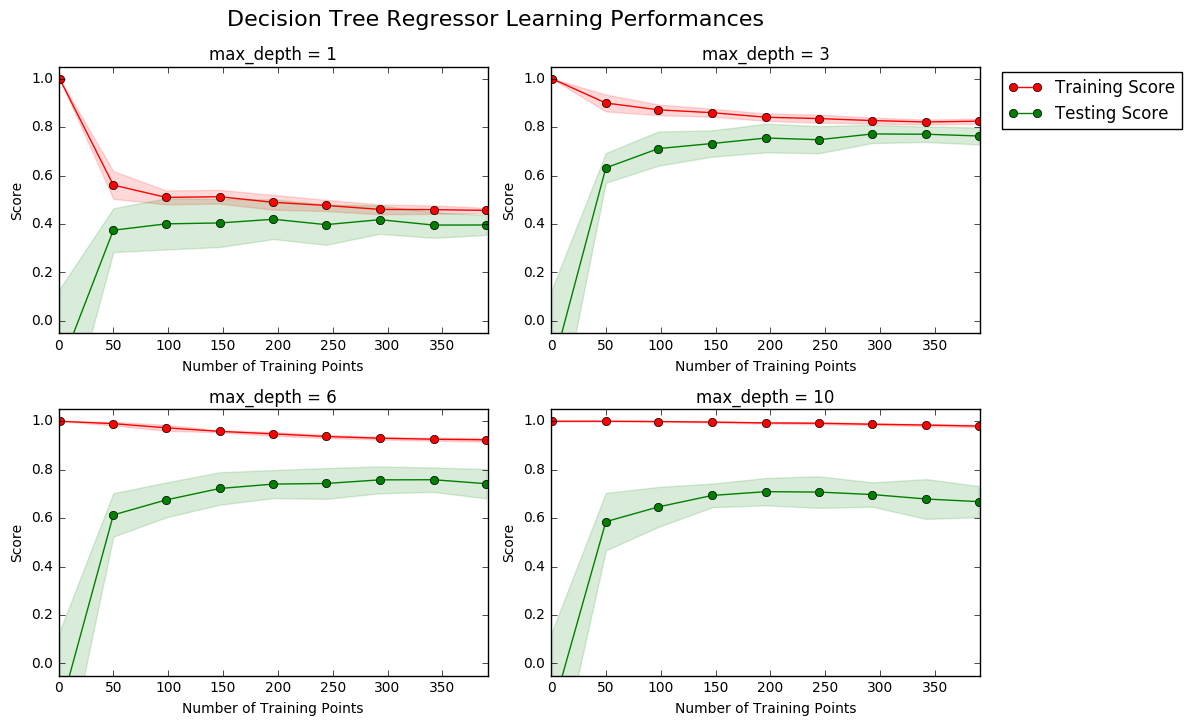

In [48]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

## max_depth = 3 (upper right)
In general, even a simple model can predict the outcome perfectly if there are only few data points. You get a very high training score. But as number of training points increases, it becomes harder for the model and the training score will decrease. That's normal.

Looking at the chart, when more and more training points are added, the training score slowly decreases until it converges at about 80%.

In general, since the test data is different from the training data, the model does not perform well if the number of training points is small. But as the number of training points increases, the model gets better and the test score increases, because the model has been trained better.

Looking at the chart, the test curve also converges at about 80% which is quite high. Also, there is only a small gap, indicating that the model performs well.

More training points would not be beneficial (unless the data are sorted in a certain way). Well, otherwise the curve wouldn't converge, right ;-)

## comparison to the other charts

### max_depth = 1 (upper left)
The chart indicates that the model suffers from high bias. While the training curve and the testing curve both converge at roughly the same score, the score is small: just 40%. As we saw, *max_depth = 3* yields better results.

### max_depth = 8 (lower left)
This chart indicates some variance or overfitting. The training curve converges at about 90%, which is better than for *max_depth = 3*, but the test curve converges at roughly 70%. We have a gap because the model works well on the training data, but starts to fail predicting correctly for the test data.

### max_depth = 10 (lower right)
Same as before, but even worse. The model scores perfectly for the training data, but it can barely score 70% for the test data. We can see a case of high variance.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

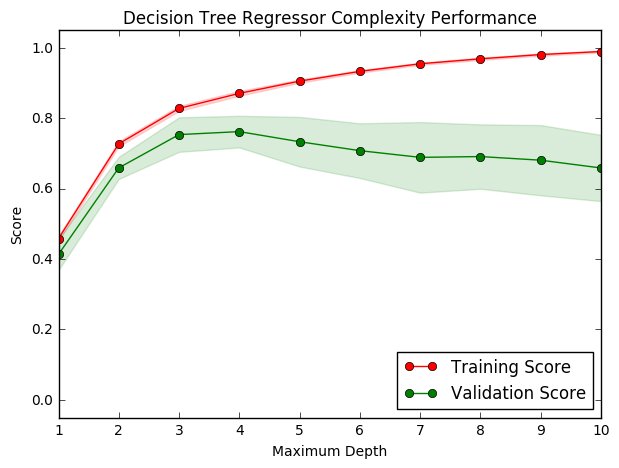

In [9]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
At a maximum depth of 1, the model suffers from high bias.

We can see that the training score and the validation score are about the same, and the training score is even within the uncertainty area of the validation score. We can deduce that the model works similarly well for the training data and the test data. Well is relative, though. The scores converge at about 40%. In other words, we have a high error. Both, the convergence at a smiliar score, but a low score (or high error) are indicatore for high bias.

At a maximum depth of 10, the model suffers from high variance.

We can see that the training score is very high (low error), but there's a large gap to the validation score. This indicates high variance.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
It's either a maximum depth of 3 or 4, I'd tend to 3, but it might depend on the scenario a little bit.

Up to a maximum depth of 3, the training and validation scores increase significantly, so 1 and 2 are out.

At maximum depth of 3, both curves still converge roughly at the same score if we also account for the uncertainty area -- and that score is quite high.

At a maximum depth level of 4, the validation score is even slightly higher, but also the gap to the training score is clearly visible now.

As of a maximum depth level of 5, the validation score keeps becoming worse and the gap to the training score widens, so these can't be the answer

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
The grid search technique is a way of optimizing your learning algorithm by systematically testing different parameters for tuning. You can define a finite set of values for each parameter of your learning algorithm. Afterwards, grid search is used to evaluate the model performance for all all possible combinations of values for each parameter. This way, you can fine tune your algorithm parameters automatically.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
The k-fold cross validation can be used for rather large data sets. The data set is split into k segments of the same size. In k iterations, you compute the score or error of the model while each segment will once be the test data and the remaining k-1 sets the training data. Finally, you calculate the mean of the k scores/errors which represents the quality of your model. This way, you don't have to worry (or worry less) which data to put into the training set and which to put into the test set.

Without a cross-validated set, using grid search the resulting parameters could possibly be well suited for your particular training set, but not for "real life". Here k-fold cross validation comes in handy. You do not only get a way to use a test set, but you also check your parameters in k different "scenarios" making it more unlikely to overfit your algorithm parameters to a particular set of training data.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [49]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor();

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [50]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
The maximum depth computed by the grid search algorithm for an optimal model is 4. I was close in my answer to question 6. I wasn't sure whether 3 or 4 would be the best solution.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [51]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **
I deduced that a high number of rooms, a low percentage of poverty and a small pupil-teacher ration would be beneficial for the price. Luckily, we can rank the three houses perfectly:

## gut level guessing

### #1 = House of Client 3
* highest number of rooms, lowest value for poverty, smallest value for pupil-teacher ratio
* There is one house that has about 8 rooms and 3% of poverty, but a pupil-teacher ratio of 14.9 (`$`966,000).
* **Consequently, I would have suggested a little more, let's say about `$`990,000)**

### #2 = House of Client 1
* medium number of rooms, medium value for poverty, medium value for pupil-teacher ratio
* There are some houses that have about 5 rooms and a pupil-teacher ratio of about 15. Among those, there's one that has a little less than 17% of poverty (`$`343,350) and one that's still pretty close with 13% of poverty (at a price of `$`411,600).
* **I would have suggested something in between, about `$`355,000**.

### #3 = House of Client 2
* lowest number of rooms, highest value fot poverty, highest value for pupil-teacher ratio
* There's one house with 3 rooms, 31% of poverty and a pupil-teacher ratio of 20 (`$`184,800).
* **The house that's for sale has slighlty worse parameters, so I'd suggest around `$`170,000.**

## comparing to the results from our model
The predicted selling prices reflect the ranking that I suggested perfectly -- but they seem to differ quite a bit:

* house of client 3: `$`990,000 (gut) VS `$`931,636 (model)
* house of client 1: `$`355,000 (gut) VS `$`403,025 (model)
* house of client 2: `$`170,000 (gut) VS `$`237,478 (model)

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [52]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $433,037.50
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $41,854.17


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
* The data is roughly 40 years old. The real estate market could have changed totally, and people of today might consider others thing important. For example, they could home school their children with all the opportunities that the internet has to offer - or teaching at school might have become better. In consequence, the pupil-teacher ratio might have become less important. Maybe the average family has become smaller and less rooms are needed. This would influence the relevance of the number of rooms. Summing it up: I would not use the data set without cross validating it with a sample from today.

* There were 10 more parameters in the original data set, such as per capita crime rate by town, weighted distances to five Boston employment centres, or index of accessibility to radial highways. Those might be relevant as well. In addition, there might be more relevant parameters, e.g. the size of the house or the garden in square feet. Of course, those could all be correlated to the three variables given and thus be irrelevant - but I guess not.

* The results seem to be quite consistent for the dataset given, but there's also a range in prices of `$`41,854.17 as can be seen above. If I were a real estate agent, people would probably be quite angry if they found out that they could have sold their house for a sum larger by that amount.

* I think that the data from Boston would not be applicable in a rural city because there are probably vast differences in the socio-economic structure of the population. The kind of region (metropolitan, urban, rural) might be an parameter on its own.